## Normal Distribution
---

The p.d.f. of a <font color=red>normal distribution</font> is 

\begin{align*}
 & p(x|\mu,\sigma^2) = \frac1{\sqrt{2\pi\sigma^2}}
 \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right], \\
 & -\infty<x<\infty,\ -\infty<\mu<\infty,\ \sigma^2>0, \\
 &\mathrm{E}[X]=\mu,\quad \mathrm{Var}[X]=\sigma^2.
\end{align*}


In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
import scipy.stats as st
from IPython.display import display

In [2]:
def interactive_normal_plot():
    mu_slider = widgets.FloatSlider(min=-10.0, max=10.0, step=0.1, value=0.0, description='$\\mu$:')
    sigma_slider = widgets.FloatLogSlider(min=-1.0, max=1.0, step=0.1, value=1.0, description='$\\sigma$:')
    x = np.linspace(-16.0, 16.0, 1001)

    def normal_plot(mu, sigma):
        normal_pdf = st.norm.pdf(x, loc=mu, scale=sigma)
        plt.figure(figsize=(8, 6))
        plt.plot(x, normal_pdf, label=f'Normal({mu:.2f}, ({sigma:.2f})$^{2}$)')
        plt.xlabel('$x$')
        plt.ylabel('Probability Density')
        plt.title('Normal Distribution')
        plt.xlim(np.min(x), np.max(x))
        plt.ylim(0.0, 1.1 * np.max(normal_pdf) if np.max(normal_pdf) > 0 else 1.0)
        plt.legend(loc='best')
        plt.show()

    return widgets.interactive(normal_plot, mu=mu_slider, sigma=sigma_slider)

interactive_normal_plot()

interactive(children=(FloatSlider(value=0.0, description='$\\mu$:', max=10.0, min=-10.0), FloatLogSlider(value…

## Inverse Gamma Distribution and Student's $t$-distribution
---

The p.d.f. of an <font color=red>inverse gamma distribution</font> is

\begin{equation*}
 p(x|\alpha,\beta)
 = \frac{\beta^\alpha}{\Gamma(\alpha)}
 x^{-(\alpha+1)}\exp\left(-\frac{\beta}{x}\right),\ x > 0,\ \alpha > 0,\ \beta > 0.
\end{equation*}

The p.d.f. of a (Student's) <font color=red>$t$-distribution</font> is 

\begin{align*}
 & p(x|\nu,\mu,\sigma^2) = \frac{\Gamma\left(\frac{\nu+1}2\right)}{\Gamma\left(\frac{\nu}2\right)\sqrt{\pi\nu\sigma^2}}
 \left[1 + \frac{(x-\mu)^2}{\nu\sigma^2}\right]^{-\frac{\nu+1}2}, \\
 & -\infty<x<\infty,\ \nu>0,\ -\infty<\mu<\infty,\ \sigma^2>0, \\
 & \mathrm{E}[X] = \mu,\ (\nu > 1),\ \mathrm{Var}[X] = \frac{\nu}{\nu-2}\sigma^2,\ (\nu>2).
\end{align*}


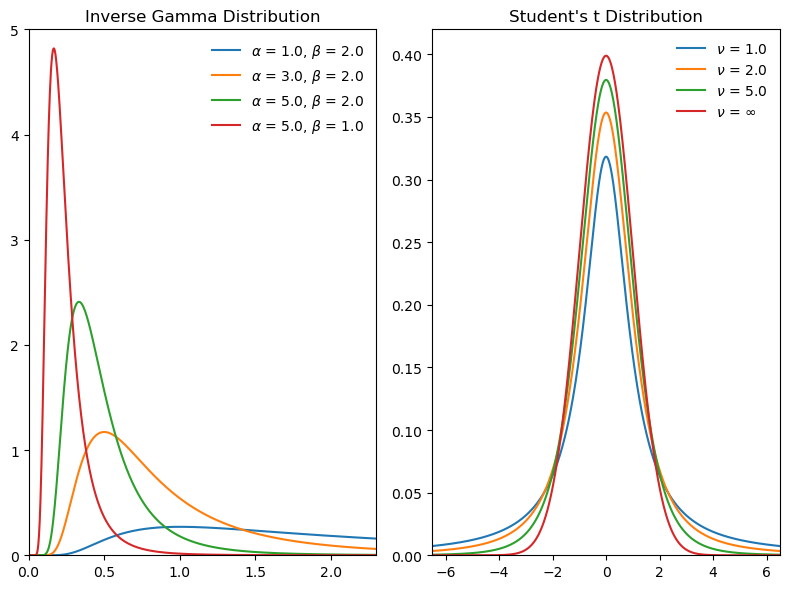

In [3]:
value_a = np.array([1.0, 3.0, 5.0, 5.0])
value_b = np.array([2.0, 2.0, 2.0, 1.0])
value_n = np.array([1.0, 2.0, 5.0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
# inverse gamma  distributiona
x1 = np.linspace(0, 2.3, 1001)
for index in range(value_a.size):
    a_i = value_a[index]
    b_i = value_b[index]
    plot_label = f'$\\alpha$ = {a_i:3.1f}, $\\beta$ = {b_i:3.1f}'
    ax[0].plot(x1, st.invgamma.pdf(x1, a_i, scale=b_i), label=plot_label)
ax[0].set_title('Inverse Gamma Distribution')
ax[0].set_xlim((0, 2.3))
ax[0].set_ylim((0, 5))
ax[0].legend(frameon=False)
# Student's t distribution
x2 = np.linspace(-6.5, 6.5, 1001)
for index in range(value_n.size):
    n_i = value_n[index]
    plot_label = f'$\\nu$ = {n_i:3.1f}'
    ax[1].plot(x2, st.t.pdf(x2, n_i), label=plot_label)
ax[1].plot(x2, st.norm.pdf(x2), label='$\\nu$ = $\\infty$')
ax[1].set_title("Student's t Distribution")
ax[1].set_xlim((-6.5, 6.5))
ax[1].set_ylim((0, 0.42))
ax[1].legend(frameon=False)
plt.tight_layout()
plt.show()

## Normal-Inverse-Gamma Prior
---

The natural conjugate prior distribution for $(\mu,\sigma^2)$ is

\begin{equation*}
 \mu|\sigma^2 \sim \mathrm{Normal}\left(\mu_0,\frac{\sigma^2}{n_0}\right), \ 
 \sigma^2 \sim \mathrm{Inv. Gamma}\left(\frac{\nu_0}2,\frac{\lambda_0}2\right).
\end{equation*}

The joint p.d.f. of the prior distribution is given by

\begin{align*}
 p(\mu,\sigma^2) &= p(\mu|\sigma^2)p(\sigma^2), \\
 p(\mu|\sigma^2)
 &= \sqrt{\frac{n_0}{2\sigma^2}}\exp\left[-\frac{n_0(\mu-\mu_0)^2}{2\sigma^2}\right] , \\
 p(\sigma^2)
 &= \frac{\left(\frac{\lambda_0}2\right)^{\frac{\nu_0}2}}{\Gamma\left(\frac{\nu_0}2\right)}(\sigma^2)^{-\left(\frac{\nu_0}2+1\right)}\exp\left(-\frac{\lambda_0}{2\sigma^2}\right).
\end{align*}

The joint distribution of $(\mu, \sigma^2)$ is often called the normal-inverse-gamma distribution.

## Likelihood
---

The likelihood of $(\mu, \sigma^2)$ is
\begin{align*}
 p(D|\mu,\sigma^2)
 &= \prod_{i=1}^n p(x_i|\mu,\sigma^2) \\
 &= \prod_{i=1}^n \frac1{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right] \\
 &= (2\pi\sigma^2)^{-\frac{n}2}\exp\left[-\frac{\sum_{i=1}^n(x_i-\mu)^2}{2\sigma^2}\right].
\end{align*}

Since

\begin{align*}
 \sum_{i=1}^n(x_i-\mu)^2
 &= \sum_{i=1}^n(x_i-\bar x+\bar x-\mu)^2 \\
 &= \sum_{i=1}^n\left\{(x_i-\bar x)^2 + 2(x_i-\bar x)(\bar x - \mu) + (\bar x - \mu)^2\right\} \\
 &= \sum_{i=1}^n(x_i-\bar x)^2 + n(\bar x - \mu)^2,
\end{align*}

the likelihood is rewritten as

\begin{equation*}
 p(D|\mu,\sigma^2)
 \propto (\sigma^2)^{-\frac{n}2}\exp\left[-\frac{\sum_{i=1}^n(x_i-\bar x)^2 + n(\bar x - \mu)^2}{2\sigma^2}\right].
\end{equation*}

## Joint Posterior Distribution
---

Applying Bayes' theorem, we have

\begin{align*}
 & p(\mu,\sigma^2|D) \nonumber \\
 &\propto p(D|\mu,\sigma^2)p(\mu|\sigma^2)p(\sigma^2) \\
 &\propto (\sigma^2)^{-\frac{n}2}\exp\left[-\frac{\sum_{i=1}^n(x_i-\bar x)^2 + n(\bar x - \mu)^2}{2\sigma^2}\right]
 \nonumber \\
 &\quad\times (\sigma^2)^{-\frac12}\exp\left[-\frac{n_0(\mu-\mu_0)^2}{2\sigma^2}\right]
 \times (\sigma^2)^{-\left(\frac{\nu_0}2+1\right)}\exp\left[-\frac{\lambda_0}{2\sigma^2}\right] \\
 &\propto (\sigma^2)^{-\frac{n+\nu_0+3}2}\exp\Bigg[-\frac1{2\sigma^2}\bigg\{\sum_{i=1}^n(x_i-\bar x)^2
 + n(\bar x - \mu)^2  \nonumber\\
 &\qquad\qquad\qquad\qquad\qquad\qquad\qquad + n_0(\mu-\mu_0)^2 + \lambda_0\bigg\}\Bigg].
\end{align*}

By completing the square, we have

\begin{align*}
 & n(\bar x - \mu)^2 + n_0(\mu-\mu_0)^2 \\
 &= (n+n_0)\mu^2 - 2(n\bar x + n_0\mu_0)\mu + n\bar x^2 + n_0\mu_0^2 \\
 &= (n+n_0)\left(\mu - \frac{n\bar x + n_0\mu_0}{n+n_0}\right)^2 +
 \frac{nn_0}{n+n_0}(\mu_0-\bar x)^2.
\end{align*}

Therefore the joint posterior distribution of $(\mu, \sigma^2)$ is derived as 

\begin{align*}
 p(\mu,\sigma^2|D)
 &\propto (\sigma^2)^{-\frac12}\exp\left[-\frac{n_*(\mu-\mu_*)^2}{2\sigma^2}\right] \\
 &\quad\times (\sigma^2)^{-\left(\frac{\nu_*}2+1\right)}\exp\left(-\frac{\lambda_*}{2\sigma^2}\right),
\end{align*}

where

\begin{align*}
 \mu_* &= \frac{n\bar x + n_0\mu_0}{n + n_0},\quad n_* = n + n_0,\quad \nu_* = n + \nu_0, \\
 \lambda_* &= \sum_{i=1}^n(x_i-\bar x)^2 + \frac{nn_0}{n+n_0}(\mu_0-\bar x)^2 + \lambda_0.
\end{align*}

This is also a normal-inverse-gamma distribution.

\begin{equation*}
 \mu|\sigma^2,D \sim \mathrm{Normal}\left(\mu_*,\frac{\sigma^2}{n_*}\right),\quad
 \sigma^2|D \sim \mathrm{Inv. Gamma}\left(\frac{\nu_*}2,\frac{\lambda_*}2\right).
\end{equation*}

## Marginal Posterior Distributions
---

The marginal posterior distribution of $\mu$ is a Student's $t$-distribution:

\begin{equation*}
 \mu|D\sim\mathrm{t}\left(\nu_*,\mu_*,\tau_*^2\right),\quad
 \tau_*^2 = \frac{\lambda_*}{\nu_*n_*}.
\end{equation*}

The marginal posterior distribution of $\sigma^2$ is an inverse gamma distribution:

\begin{equation*}
 \sigma^2|D \sim \mathrm{Inv. Gamma}\left(\frac{\nu_*}2,\frac{\lambda_*}2\right).
\end{equation*}

### HDPI of the inverse gamma distribution

In [4]:
def invgamma_hpdi(prob, alpha, beta, ci0=None):
    def hpdi_conditions(v, p, a, b):
        eq1 = st.invgamma.cdf(v[1], a, scale=b) - st.invgamma.cdf(v[0], a, scale=b) - p
        eq2 = st.invgamma.pdf(v[1], a, scale=b) - st.invgamma.pdf(v[0], a, scale=b)
        return np.hstack((eq1, eq2))
    if not ci0:
        ci0 = st.invgamma.interval(prob, alpha, scale=beta)
    return opt.root(hpdi_conditions, ci0, args=(prob, alpha, beta)).x

### Posterior statistics of the parameters in the normal distribution

In [5]:
def gaussian_stats(data, hyper_param, prob=0.95):
    mu0 = hyper_param['mu0']
    n0 = hyper_param['n0']
    nu0 = hyper_param['nu0']
    lam0 = hyper_param['lam0']
    n = data.size
    mean_data = data.mean()
    ssd_data = n * data.var()
    n_star = n + n0
    mu_star = (n * mean_data + n0 * mu0) / n_star
    nu_star = n + nu0
    lam_star = ssd_data + n * n0 / n_star * (mu0 - mean_data)**2 + lam0
    tau_star = np.sqrt(lam_star / nu_star / n_star)
    sd_mu = st.t.std(nu_star, loc=mu_star, scale=tau_star)
    ci_mu = st.t.interval(prob, nu_star, loc=mu_star, scale=tau_star)
    mean_sigma2 = st.invgamma.mean(0.5*nu_star, scale=0.5*lam_star)
    mode_sigma2 = lam_star / (nu_star + 2.0)
    median_sigma2 = st.invgamma.median(0.5*nu_star, scale=0.5*lam_star)
    sd_sigma2 = st.invgamma.std(0.5*nu_star, scale=0.5*lam_star)
    ci_sigma2 = st.invgamma.interval(prob, 0.5*nu_star, scale=0.5*lam_star)
    hpdi_sigma2 = invgamma_hpdi(prob, 0.5*nu_star, 0.5*lam_star)
    stats_mu = np.hstack((mu_star, mu_star, mu_star, sd_mu, ci_mu, ci_mu))
    stats_sigma2 = np.hstack((mean_sigma2, median_sigma2, mode_sigma2,
                              sd_sigma2, ci_sigma2, hpdi_sigma2))
    stats = np.vstack((stats_mu, stats_sigma2))
    lower = 0.5 * (1.0 - prob) * 100.0
    upper = 0.5 * (1.0 + prob) * 100.0
    stats_string = ['mean', 'median', 'mode', 'sd',
                    f'ci ({lower:4.1f}%)', f'ci ({upper:4.1f}%)',
                    f'hpdi ({lower:4.1f}%)', f'hpdi ({upper:4.1f}%)']
    param_string = ['$\\mu$', '$\\sigma^2$']
    results = pd.DataFrame(stats, index=param_string, columns=stats_string)
    return results

### Plotting the posterior distribution of the parameters in the normal distribution

In [6]:
def interactive_normal_posterior_plot(data, hyper_param, bounds):
    mu0_slider = widgets.FloatSlider(min=-4.0, max=4.0, step=0.1, value=hyper_param['mu0'], description='$\\mu_{0}$:')
    n0_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=hyper_param['n0'], description='$n_{0}$:')
    nu0_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=hyper_param['nu0'], description='$\\nu_{0}$:')
    lam0_slider = widgets.FloatLogSlider(min=-2.0, max=2.0, step=0.1, value=hyper_param['lam0'], description='$\\lambda_{0}$:')
    n = data.size
    x1 = np.linspace(bounds[0][0], bounds[0][1], 1001)
    x2 = np.linspace(bounds[1][0], bounds[1][1], 1001)
    
    def normal_posterior_plot(mu0, n0, nu0, lam0):
        tau0 = np.sqrt(lam0 / nu0 / n0)
        mean_data = data.mean()
        ssd_data = n * data.var()
        n_star = n + n0
        mu_star = (n * mean_data + n0 * mu0) / n_star
        nu_star = n + nu0
        lam_star = ssd_data + n * n0 / n_star * (mu0 - mean_data)**2 + lam0
        tau_star = np.sqrt(lam_star / nu_star / n_star)
        mu_prior_pdf = st.t.pdf(x1, nu0, loc=mu0, scale=tau0)
        mu_posterior_pdf = st.t.pdf(x1, nu_star, loc=mu_star, scale=tau_star)
        sigma2_prior_pdf = st.invgamma.pdf(x2, 0.5*nu0, scale=0.5*lam0)
        sigma2_posterior_pdf = st.invgamma.pdf(x2, 0.5*nu_star, scale=0.5*lam_star)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
        ax[0].plot(x1, mu_prior_pdf, label=f'Prior: t({mu0:.2f}, ({tau0:.2f})$^{2}$, {nu0:.2f})')
        ax[0].plot(x1, mu_posterior_pdf, label=f'Posterior: t({mu_star:.2f}, ({tau_star:.2f})$^{2}$, {nu_star:.2f})')
        ax[0].set_xlabel('$\\mu$')
        ax[0].set_ylabel('Probability Density')
        ax[0].legend(frameon=False)
        ax[0].set_xlim(bounds[0])
        ax[0].set_ylim(0, 1.2 * np.max(np.hstack((mu_prior_pdf, mu_posterior_pdf))))
        ax[1].plot(x2, sigma2_prior_pdf, label=f'Prior: IG({nu0:.2f}/2, {lam0:.2f}/2)')
        ax[1].plot(x2, sigma2_posterior_pdf, label=f'Posterior: IG({nu_star:.2f}/2, {lam_star:.2f}/2)')
        ax[1].set_xlabel('$\\sigma^{2}$')
        ax[1].set_xlim(bounds[1])
        ax[1].set_ylim(0, 1.2 * np.max(np.hstack((sigma2_prior_pdf, sigma2_posterior_pdf))))
        ax[1].legend(frameon=False)
        plt.tight_layout()
        plt.show()

    return widgets.interactive(normal_posterior_plot, mu0=mu0_slider, n0=n0_slider, nu0=nu0_slider, lam0=lam0_slider)

## Application 1: Simulated Data
---

We use artificial data generated from the Normal distribution:

$$
 x_1,\dots,x_{50} \sim \mathrm{Normal}(1,2^2).
$$

The prior distribution is

$$
 \mu|\sigma^2 \sim \mathrm{Normal}\left(0,\frac{\sigma^2}{0.2}\right), \ 
 \sigma^2 \sim \mathrm{Inv. Gamma}\left(\frac{5}2,\frac{7}2\right).
$$

The marginal prior distribution of $\mu$ is

$$
 \mu \sim \mathrm{t}(5,0,7).
$$


In [7]:
rng = np.random.default_rng(seed=99)
mu, sigma, n = 1.0, 2.0, 50
data = rng.normal(loc=mu, scale=sigma, size=n)
hyper_param = dict(
    mu0 = 0.0,
    n0 = 0.2,
    nu0 = 5.0,
    lam0 = 7.0
)
results = gaussian_stats(data, hyper_param)
display(results)

,mean,median,mode,sd,ci ( 2.5%),ci (97.5%),hpdi ( 2.5%),hpdi (97.5%)
$\mu$,1.475800,1.475800,1.475800,0.241337,1.001025,1.950575,1.001025,1.950575
$\sigma^2$,2.923824,2.851997,2.718643,0.579003,2.002607,4.257437,1.899702,4.084342


In [8]:
interactive_normal_posterior_plot(data, hyper_param, ((-6.0, 6.0), (0.0, 10.0)))

interactive(children=(FloatSlider(value=0.0, description='$\\mu_{0}$:', max=4.0, min=-4.0), FloatLogSlider(val…

## Application 2: Monthly US Stock Returns
---

### Description: 

Monthly data from 1931–2002 for US stock prices, measured by the broad-based (NYSE and AMEX) value-weighted index of stock prices as constructed by the Center for Research in Security Prices (CRSP).

### Variables:

+ returns - monthly excess returns. The monthly return on stocks (in percentage terms) minus the return on a safe asset (in this case: US treasury bill). The return on the stocks includes the price changes plus any dividends you receive during the month.

+ dividend - 100 times log(dividend yield). (Multiplication by 100 means the changes are interpreted as percentage points). It is calculated as the dividends over the past 12 months, divided by the price in the current month.

### Source:

Online complements to Stock and Watson (2007).

### References:

+ Campbell, J.Y., and Yogo, M. (2006). Efficient Tests of Stock Return Predictability Journal of Financial Economics, 81, 27–60.

+ Stock, J.H. and Watson, M.W. (2007). Introduction to Econometrics, 2nd ed. Boston: Addison Wesley.

https://vincentarelbundock.github.io/Rdatasets/datasets.html


In [9]:
stock_data = pd.read_csv('USStocksSW.csv', index_col=0)
returns = stock_data['returns'].values
display(stock_data)

,returns,dividend
1,5.9650,-282.2329
2,10.3053,-293.2089
3,-6.8408,-287.8614
4,-10.4481,-278.2477
5,-14.3581,-265.4742
...,...,...
860,1.0056,-394.5930
861,-10.4640,-383.5875
862,5.9082,-388.6063
863,4.7428,-393.4719


In [10]:
hyper_param_stock = dict(
    mu0 = 0.0,
    n0 = 0.2,
    nu0 = 5.0,
    lam0 = 7.0
)
results_stock = gaussian_stats(returns, hyper_param_stock)
display(results_stock)

,mean,median,mode,sd,ci ( 2.5%),ci (97.5%),hpdi ( 2.5%),hpdi (97.5%)
$\mu$,0.502016,0.502016,0.502016,0.182520,0.144197,0.859835,0.144197,0.859835
$\sigma^2$,28.789545,28.745335,28.657331,1.384337,26.202891,31.627606,26.120253,31.533898


In [11]:
interactive_normal_posterior_plot(returns, hyper_param_stock, ((-2.0, 2.0), (20.0, 40.0)))

interactive(children=(FloatSlider(value=0.0, description='$\\mu_{0}$:', max=4.0, min=-4.0), FloatLogSlider(val…